In [ ]:
# Instala√ß√£o de pacotes necess√°rios
try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
    from wordcloud import WordCloud
    import kagglehub
except ImportError:
    # Instalar pacotes ausentes
    !pip install numpy pandas matplotlib seaborn scikit-learn scipy wordcloud kagglehub
    # Importa√ß√µes ap√≥s a instala√ß√£o
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
    from wordcloud import WordCloud
    import kagglehub

# Configura√ß√£o de estilos e ajustes gerais
plt.style.use('dark_background')  # Define fundo escuro para os gr√°ficos

# Dataset

In [ ]:
# C√©lula 1: Download do Dataset
import os
import shutil
import kagglehub

# Download do dataset e obten√ß√£o do diret√≥rio base
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

# Localizando dinamicamente o arquivo CSV no diret√≥rio baixado
dataset_path = os.path.join(path, "Country-data.csv")

# Definindo o caminho de destino na subpasta "datasets"
destination_folder = os.path.join(os.getcwd(), "datasets")
os.makedirs(destination_folder, exist_ok=True)  # Cria a pasta "datasets" se n√£o existir
destination_path = os.path.join(destination_folder, "Country-data.csv")

# Movendo o arquivo para a subpasta "datasets"
shutil.copy(dataset_path, destination_path)
print("Dataset copiado para:", destination_path)

Dataset copiado para: c:\ML\Cluster\datasets\Country-data.csv


In [24]:
# C√©lula 2: Carregamento e An√°lise Inicial do Dataset

# Importa√ß√£o
import pandas as pd

# Carregando o dataset (caminho din√¢mico definido na C√©lula 1)
data = pd.read_csv(dataset_path)

# Visualizando as primeiras linhas do dataset
print("Visualizando as primeiras linhas do dataset:")
print(data.head())

# Contando o n√∫mero de pa√≠ses √∫nicos
num_countries = data['country'].nunique()
print(f"\nN√∫mero de pa√≠ses no dataset: {num_countries}")

# Removendo a coluna de pa√≠s para an√°lise num√©rica
data_without_country = data.drop(columns=["country"])

# Visualizando estat√≠sticas descritivas para a faixa din√¢mica
print("\nFaixa din√¢mica das vari√°veis:")
print(data_without_country.describe())


Visualizando as primeiras linhas do dataset:
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  

N√∫mero de pa√≠ses no dataset: 167

Faixa din√¢mica das vari√°veis:
       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.8156

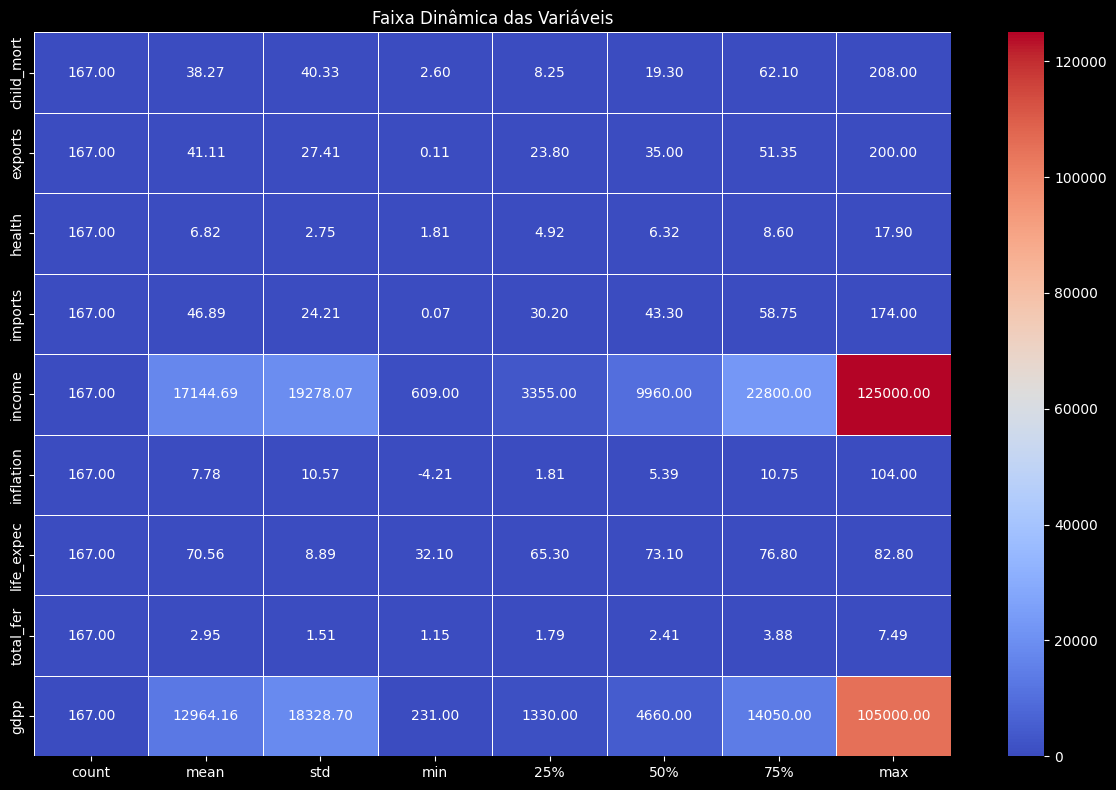

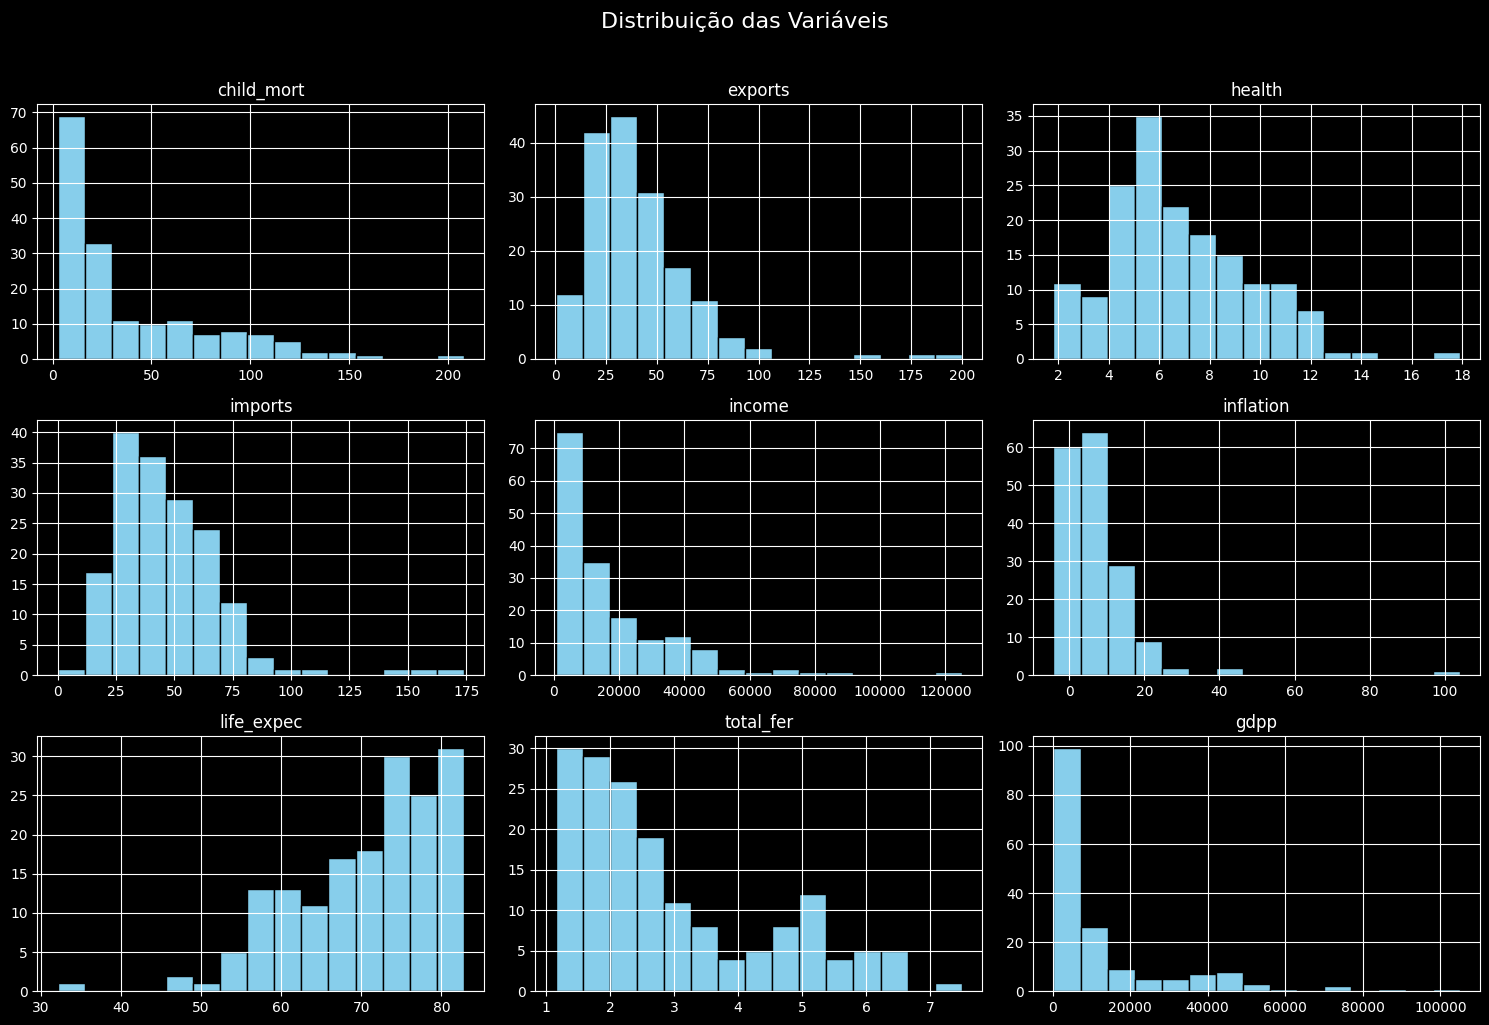

In [ ]:
# C√©lula 3: Visualiza√ß√£o da Faixa Din√¢mica

# Importa√ß√µes
import matplotlib.pyplot as plt
import seaborn as sns

# Configura√ß√£o do estilo
plt.style.use('dark_background')

# Gr√°fico alternativo: Heatmap para faixa din√¢mica
plt.figure(figsize=(12, 8))
sns.heatmap(data_without_country.describe().T, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Faixa Din√¢mica das Vari√°veis")
plt.tight_layout()
plt.show()

# Gr√°fico alternativo: Histogramas das vari√°veis
data_without_country.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribui√ß√£o das Vari√°veis", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


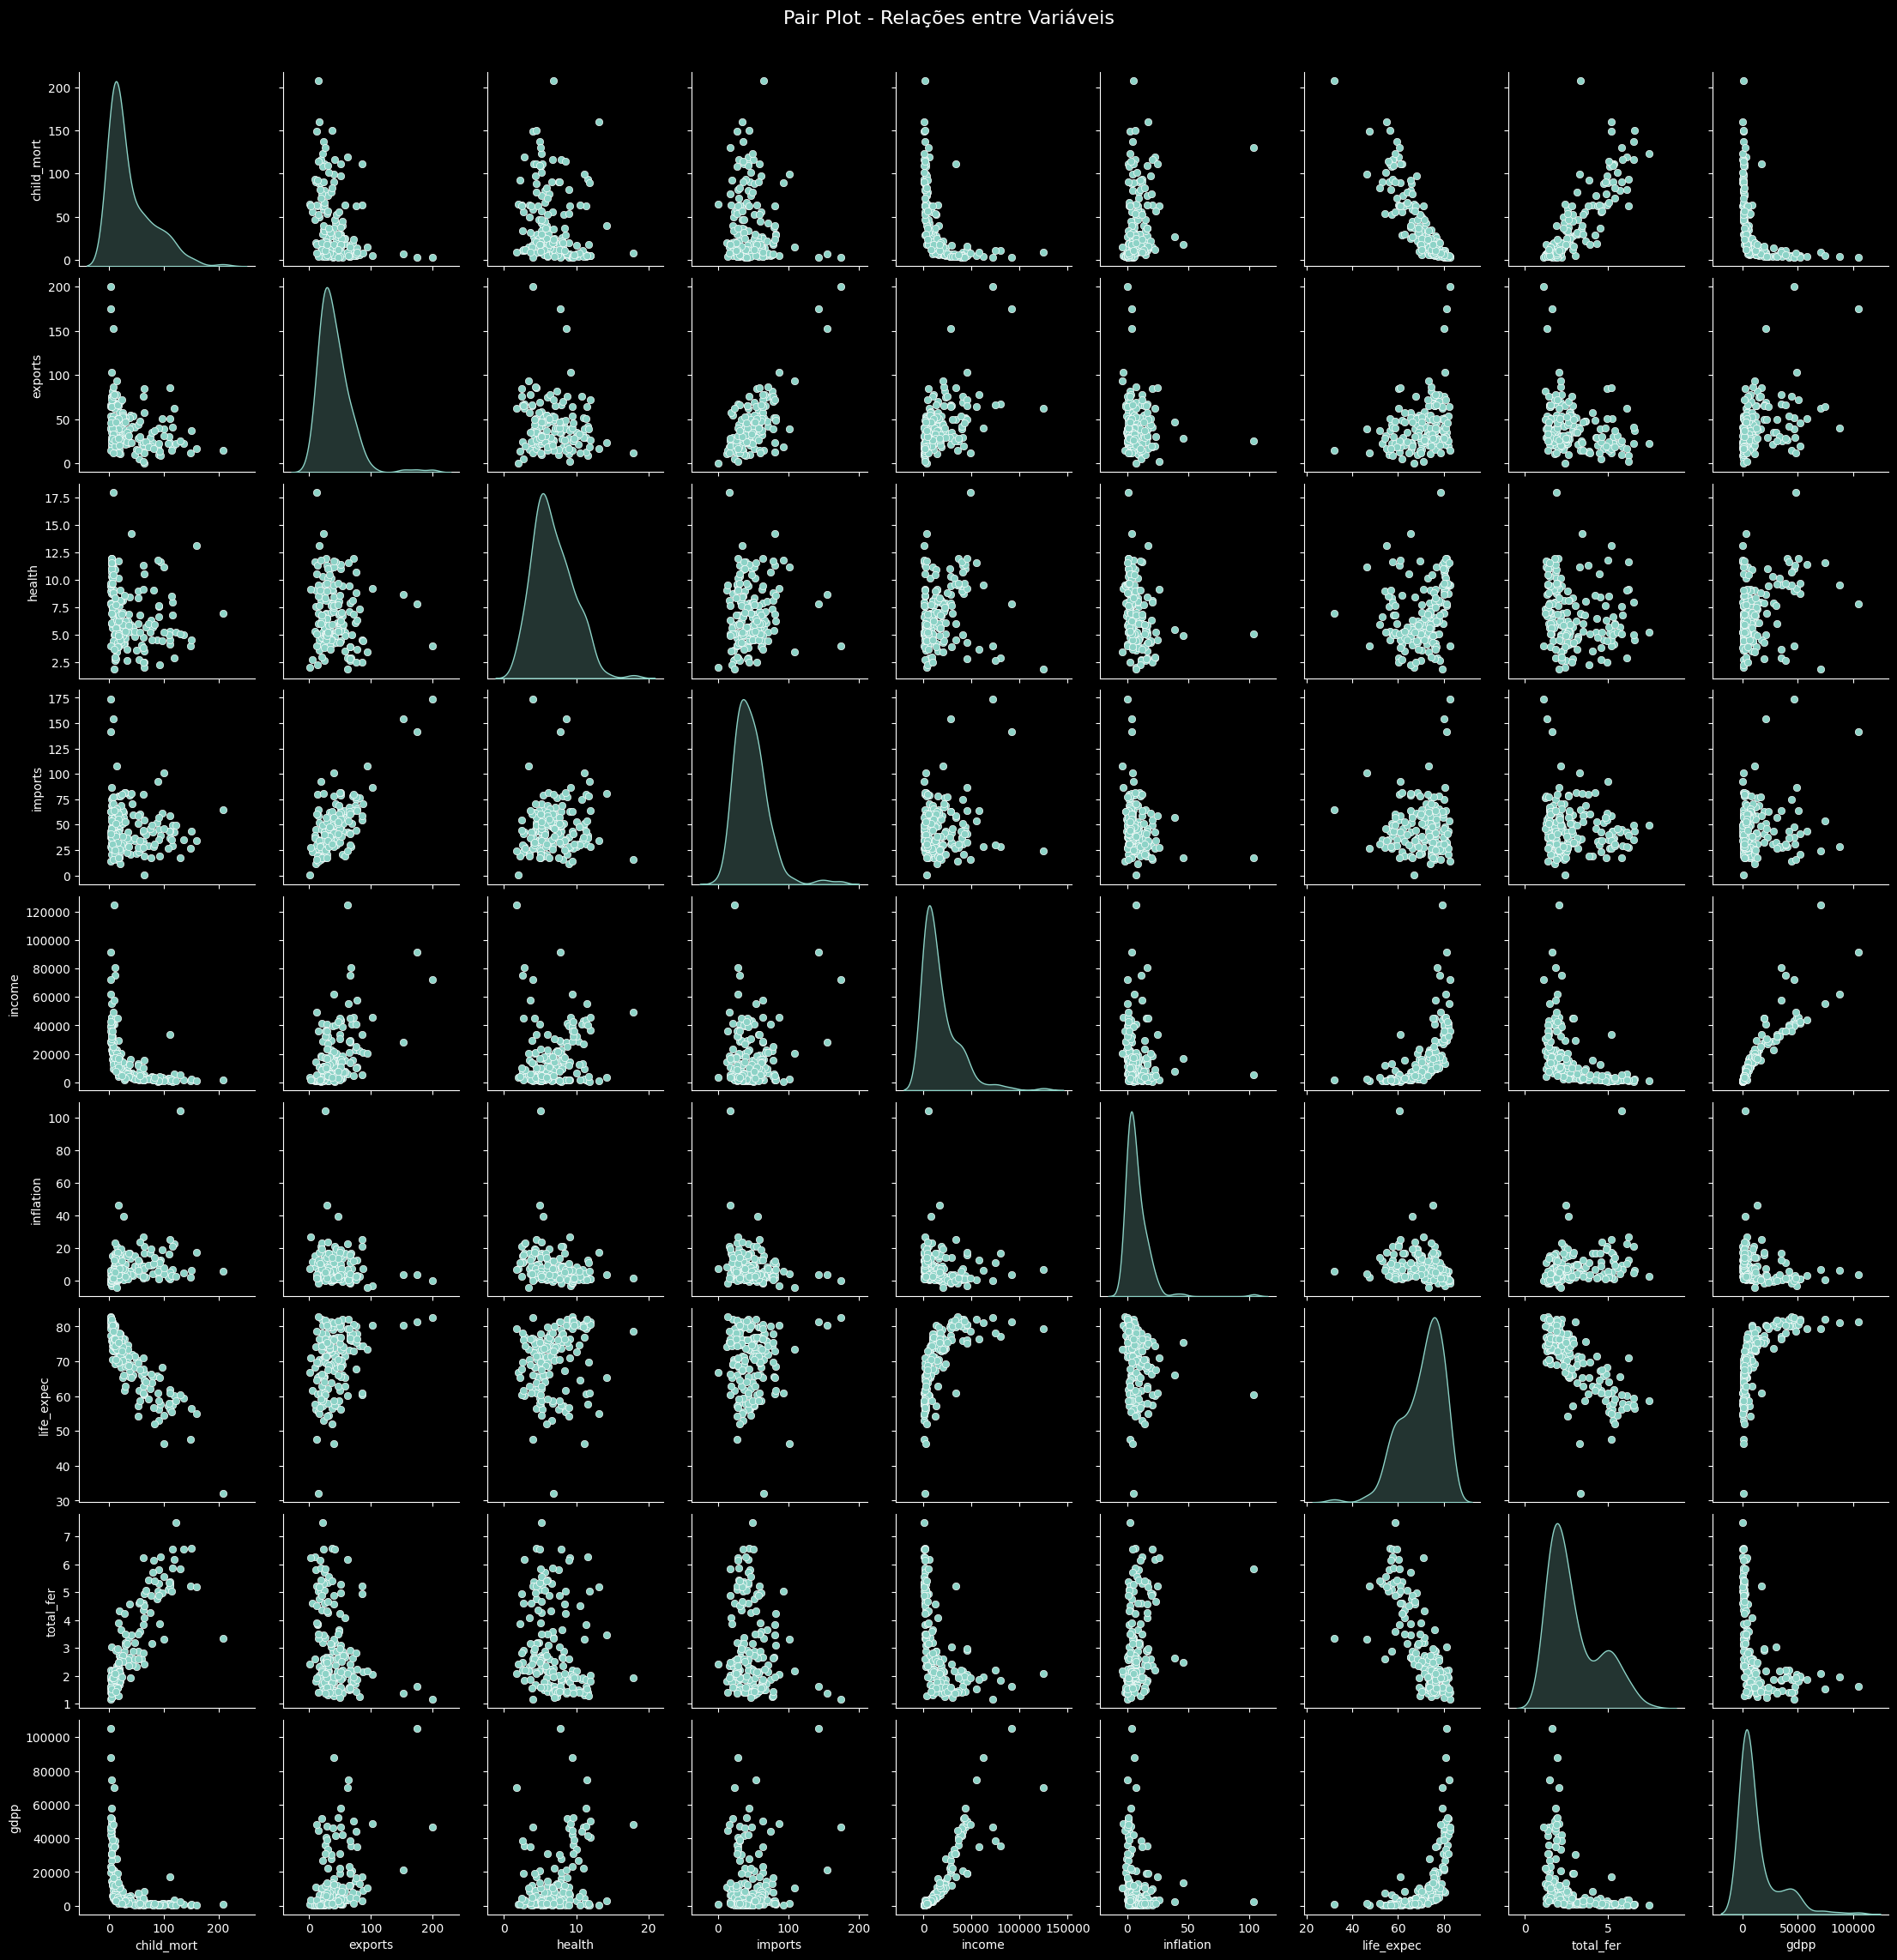

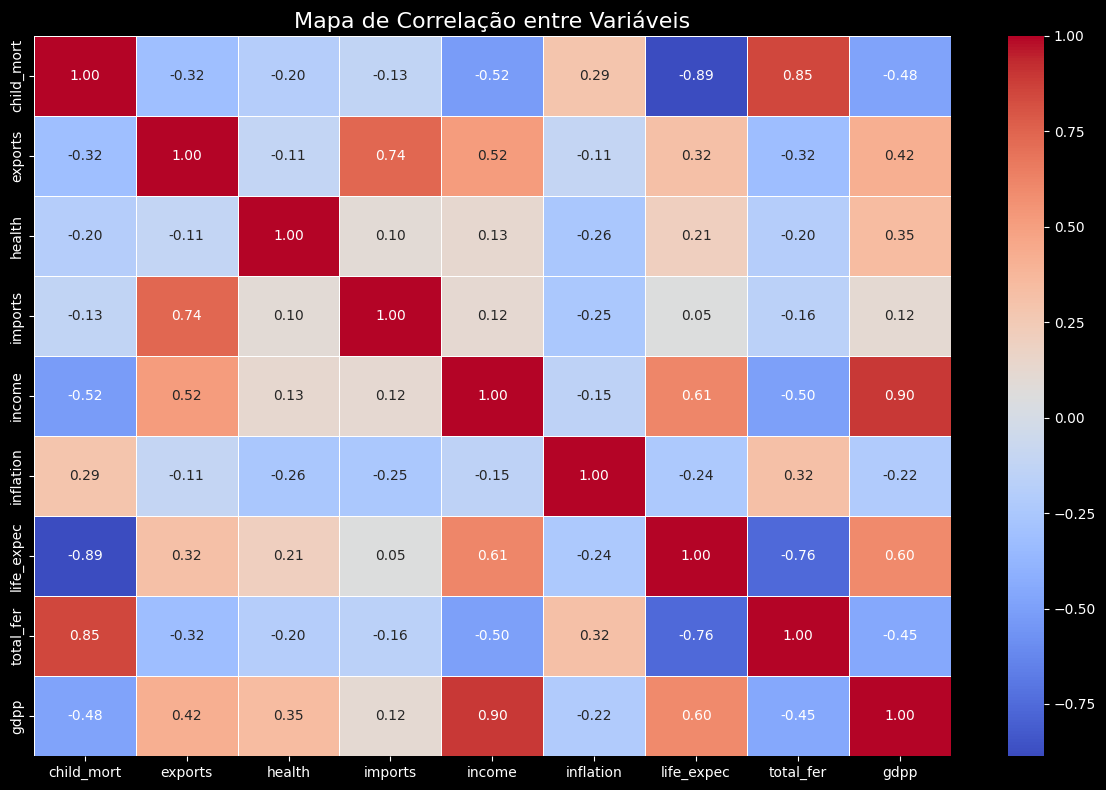

In [7]:
# C√©lula 3: Visualiza√ß√µes para Clusteriza√ß√£o



# Importa√ß√µes
import seaborn as sns
import matplotlib.pyplot as plt

# Configura√ß√£o do estilo para fundo escuro
plt.style.use('dark_background')

# 1. Pair Plot (Scatter Matrix)
# Este gr√°fico exibe pares de vari√°veis em gr√°ficos de dispers√£o para observar agrupamentos ou tend√™ncias
sns.pairplot(data_without_country, diag_kind='kde')
plt.suptitle("Pair Plot - Rela√ß√µes entre Vari√°veis", y=1.02, fontsize=16)
plt.show()

# 2. Mapa de Correla√ß√£o
# Este gr√°fico mostra a correla√ß√£o entre vari√°veis em forma de matriz, destacando rela√ß√µes lineares fortes ou fracas
plt.figure(figsize=(12, 8))
correlation_matrix = data_without_country.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Correla√ß√£o entre Vari√°veis", fontsize=16)
plt.tight_layout()
plt.show()


# Pre Processing

In [8]:
# C√©lula 4: Pr√©-Processamento dos Dados

# Verificando valores ausentes
print("Valores ausentes por coluna:")
print(data_without_country.isnull().sum())

# Preenchendo valores ausentes com a m√©dia (se houver)
data_preprocessed = data_without_country.fillna(data_without_country.mean())

# Normaliza√ß√£o (Standard Scaling)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_preprocessed)

# Convertendo de volta para DataFrame com os mesmos nomes de colunas
data_normalized = pd.DataFrame(data_normalized, columns=data_preprocessed.columns)

# Detectando outliers usando o intervalo interquartil (IQR)
Q1 = data_preprocessed.quantile(0.25)
Q3 = data_preprocessed.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data_preprocessed < (Q1 - 1.5 * IQR)) | (data_preprocessed > (Q3 + 1.5 * IQR))).sum()

print("\nN√∫mero de outliers por vari√°vel:")
print(outliers)

# Removendo outliers (dependendo do impacto)
data_cleaned = data_preprocessed[~((data_preprocessed < (Q1 - 1.5 * IQR)) | (data_preprocessed > (Q3 + 1.5 * IQR))).any(axis=1)]

# Exibindo as estat√≠sticas finais
print("\nEstat√≠sticas ap√≥s pr√©-processamento:")
print(data_cleaned.describe())


Valores ausentes por coluna:
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

N√∫mero de outliers por vari√°vel:
child_mort     4
exports        5
health         2
imports        4
income         8
inflation      5
life_expec     3
total_fer      1
gdpp          25
dtype: int64

Estat√≠sticas ap√≥s pr√©-processamento:
       child_mort     exports      health     imports        income  \
count  128.000000  128.000000  128.000000  128.000000    128.000000   
mean    38.799219   37.427336    6.345000   45.127077  11149.851562   
std     33.964248   18.794958    2.213079   17.771282   9774.820899   
min      3.200000    0.109000    1.970000    0.065900    609.000000   
25%     11.700000   23.550000    4.912500   31.375000   3225.000000   
50%     24.100000   34.000000    6.005000   43.500000   8510.000000   
75%     62.200000   50.275000    7.790000   57.650000  16050.000000   
max

In [9]:
data_cleaned.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200

# Clutering 

## K-Mean

Pa√≠ses mais pr√≥ximos dos centr√≥ides de cada cluster:
Cluster 0: Uzbekistan
Cluster 1: Spain
Cluster 2: Panama


c:\ML\Cluster\cluster_1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


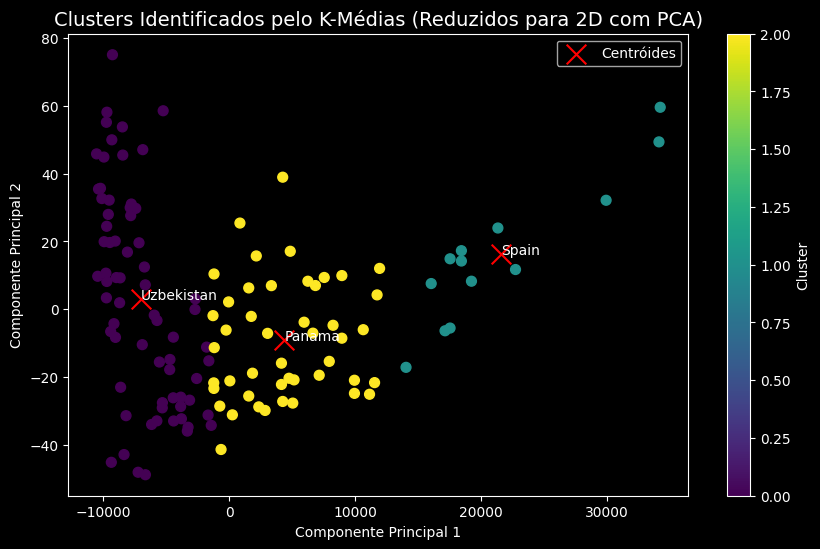

In [12]:
# C√©lula 5: Clusteriza√ß√£o com K-M√©dias (com centr√≥ides nomeados no gr√°fico)

# Importa√ß√µes
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Aplicando o K-M√©dias com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_cleaned.iloc[:, :-2])  # Apenas colunas num√©ricas originais

# Adicionando os r√≥tulos dos clusters aos dados
data_cleaned = data_cleaned.copy()  # Evita o aviso
data_cleaned['Cluster_KMeans'] = kmeans.labels_

# Calculando os centr√≥ides dos clusters
centroids = kmeans.cluster_centers_

# Encontrando o pa√≠s mais pr√≥ximo de cada centr√≥ide
country_names = data.loc[data_cleaned.index, 'country']  # Recuperando os nomes dos pa√≠ses
centroid_countries = []

for i, centroid in enumerate(centroids):
    # Usando apenas as colunas num√©ricas originais para calcular as dist√¢ncias
    distances = np.linalg.norm(data_cleaned.iloc[:, :-2].values - centroid, axis=1)
    closest_country_index = distances.argmin()
    closest_country = country_names.iloc[closest_country_index]
    centroid_countries.append(closest_country)

# Exibindo os nomes dos pa√≠ses mais pr√≥ximos dos centr√≥ides
print("Pa√≠ses mais pr√≥ximos dos centr√≥ides de cada cluster:")
for i, country in enumerate(centroid_countries):
    print(f"Cluster {i}: {country}")

# Visualizando os clusters em um gr√°fico 2D (usando PCA para reduzir a dimensionalidade)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_cleaned.iloc[:, :-2])  # Apenas colunas num√©ricas originais

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    data_pca[:, 0], data_pca[:, 1], 
    c=data_cleaned['Cluster_KMeans'], cmap='viridis', s=50
)

# Adicionando os centr√≥ides ao gr√°fico
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            c='red', marker='x', s=200, label='Centr√≥ides')

# Adicionando os nomes dos pa√≠ses pr√≥ximos aos centr√≥ides
for i, txt in enumerate(centroid_countries):
    plt.annotate(txt, (centroids_pca[i, 0], centroids_pca[i, 1]), fontsize=10, color='white')

plt.title("Clusters Identificados pelo K-M√©dias (Reduzidos para 2D com PCA)", fontsize=14)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.show()


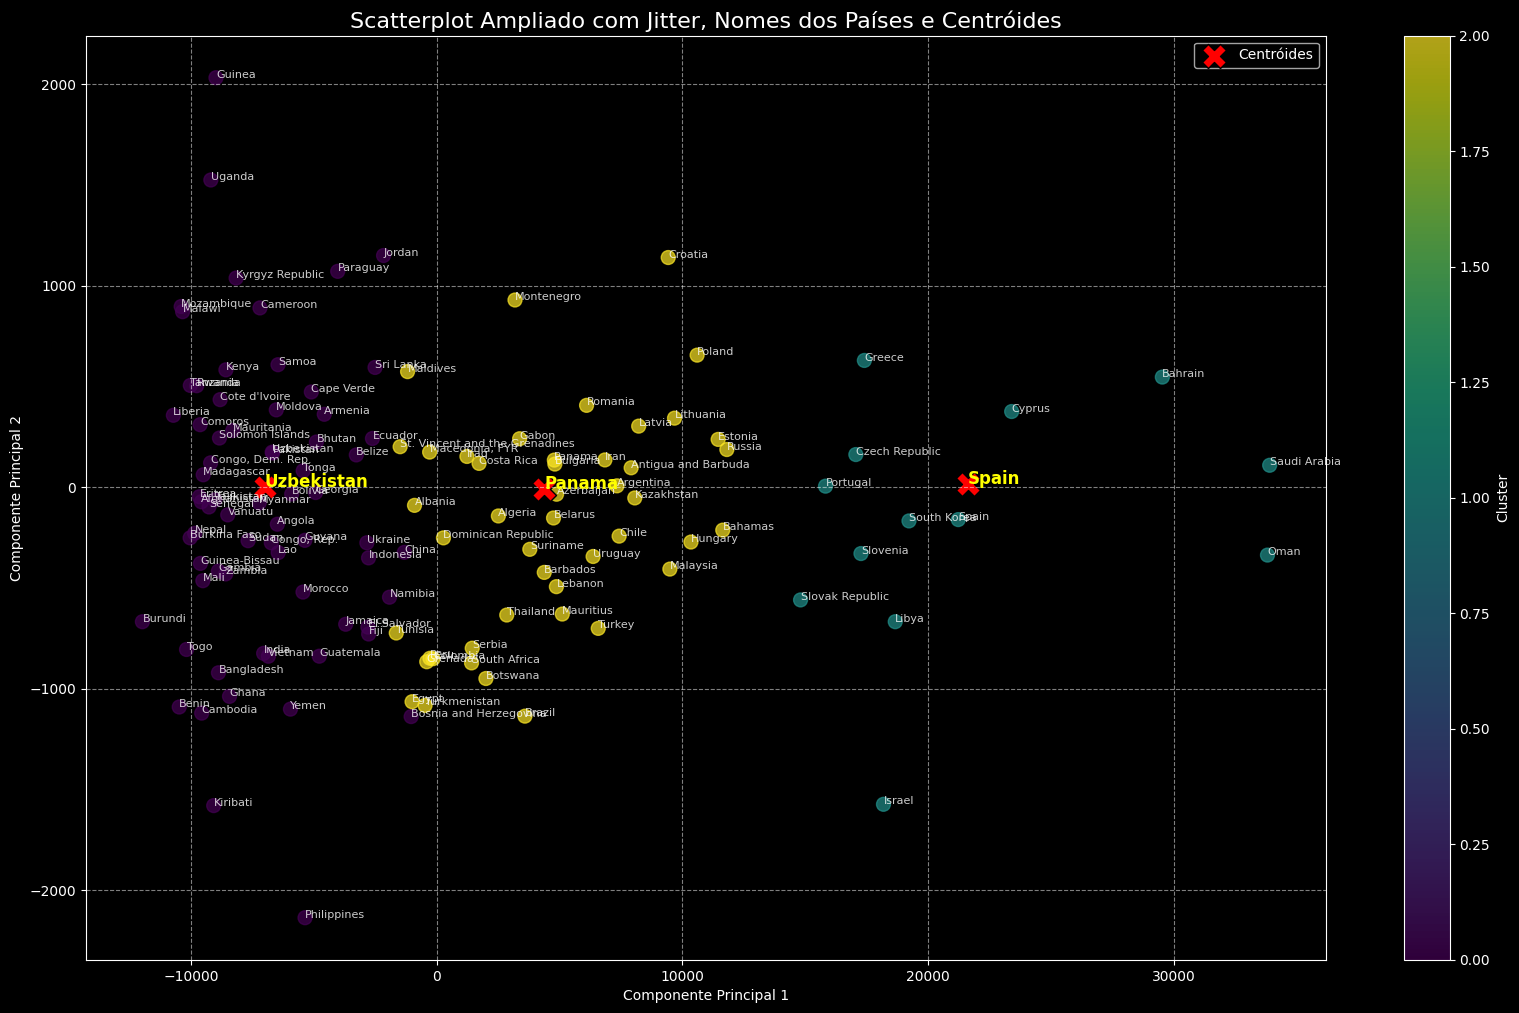

In [13]:
# C√©lula 5.5: Scatterplot Ampliado com Jitter, Nomes dos Pa√≠ses e Centr√≥ides

import matplotlib.pyplot as plt
import numpy as np

# Adicionando jitter (ru√≠do aleat√≥rio pequeno) √†s coordenadas
jitter_strength = 600  # Ajuste para controlar a intensidade do espalhamento
data_pca_jittered = data_pca + np.random.normal(0, jitter_strength, data_pca.shape)


# Plotando os clusters em 2D com centr√≥ides destacados
plt.figure(figsize=(20, 12))
scatter = plt.scatter(
    data_pca_jittered[:, 0], data_pca_jittered[:, 1],
    c=data_cleaned['Cluster_KMeans'], cmap='viridis', s=100, alpha=0.7
)

# Adicionando os nomes dos pa√≠ses a cada ponto
for i, txt in enumerate(country_names):
    plt.annotate(txt, (data_pca_jittered[i, 0], data_pca_jittered[i, 1]), fontsize=8, alpha=0.8, color='white')

# Adicionando os centr√≥ides ao gr√°fico (sem jitter nos centr√≥ides)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            c='red', marker='X', s=300, label='Centr√≥ides', edgecolors='black')

# Adicionando os nomes dos pa√≠ses pr√≥ximos aos centr√≥ides
for i, txt in enumerate(centroid_countries):
    plt.annotate(txt, (centroids_pca[i, 0], centroids_pca[i, 1]), fontsize=12, color='yellow', weight='bold')

plt.title("Scatterplot Ampliado com Jitter, Nomes dos Pa√≠ses e Centr√≥ides", fontsize=16)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



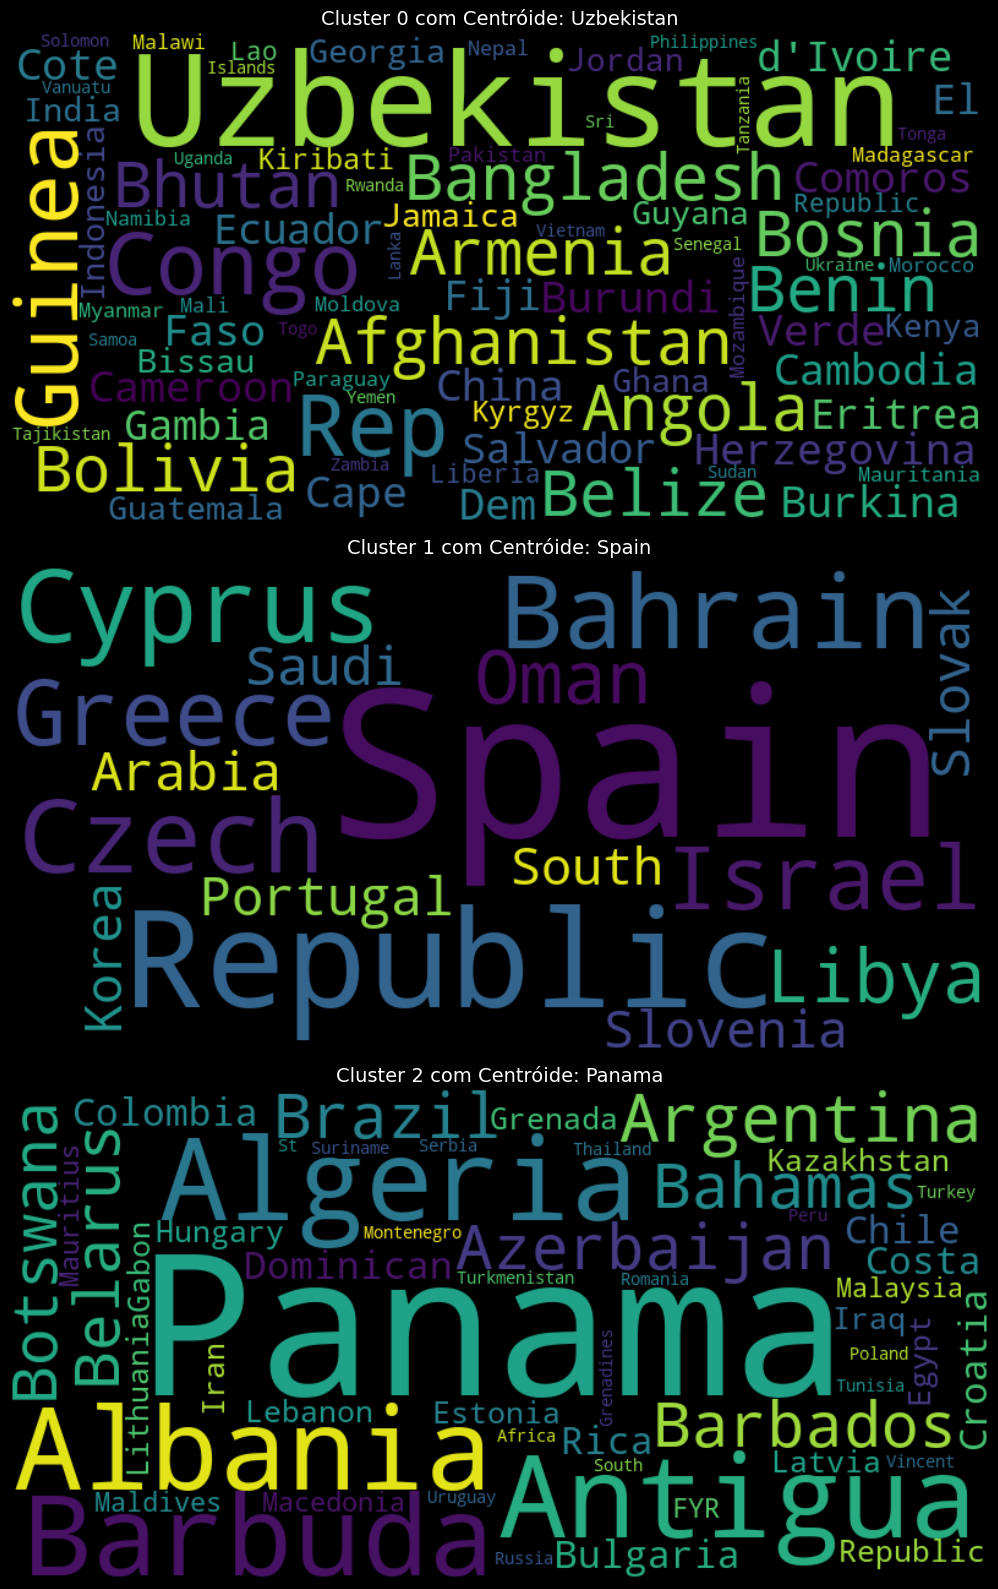

In [14]:
# C√©lula 5.6: Nuvem de Palavras por Cluster

# Importa√ß√µes
from wordcloud import WordCloud

# Criando uma nuvem de palavras para cada cluster
plt.figure(figsize=(20, 16))

for cluster_id in range(3):
    # Selecionando os pa√≠ses do cluster
    cluster_countries = country_names[data_cleaned['Cluster_KMeans'] == cluster_id]
    
    # Criando a string para a nuvem de palavras
    cluster_text = ' '.join(cluster_countries)
    cluster_text += f" {centroid_countries[cluster_id]}" * 5  # Destaca o centr√≥ide
    
    # Gerando a nuvem de palavras
    wordcloud = WordCloud(
        width=800, height=400, background_color='black', colormap='viridis'
    ).generate(cluster_text)
    
    # Plotando a nuvem de palavras
    plt.subplot(3, 1, cluster_id + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Cluster {cluster_id} com Centr√≥ide: {centroid_countries[cluster_id]}", fontsize=14)
    plt.axis('off')

plt.tight_layout()
plt.show()


## Hierachy

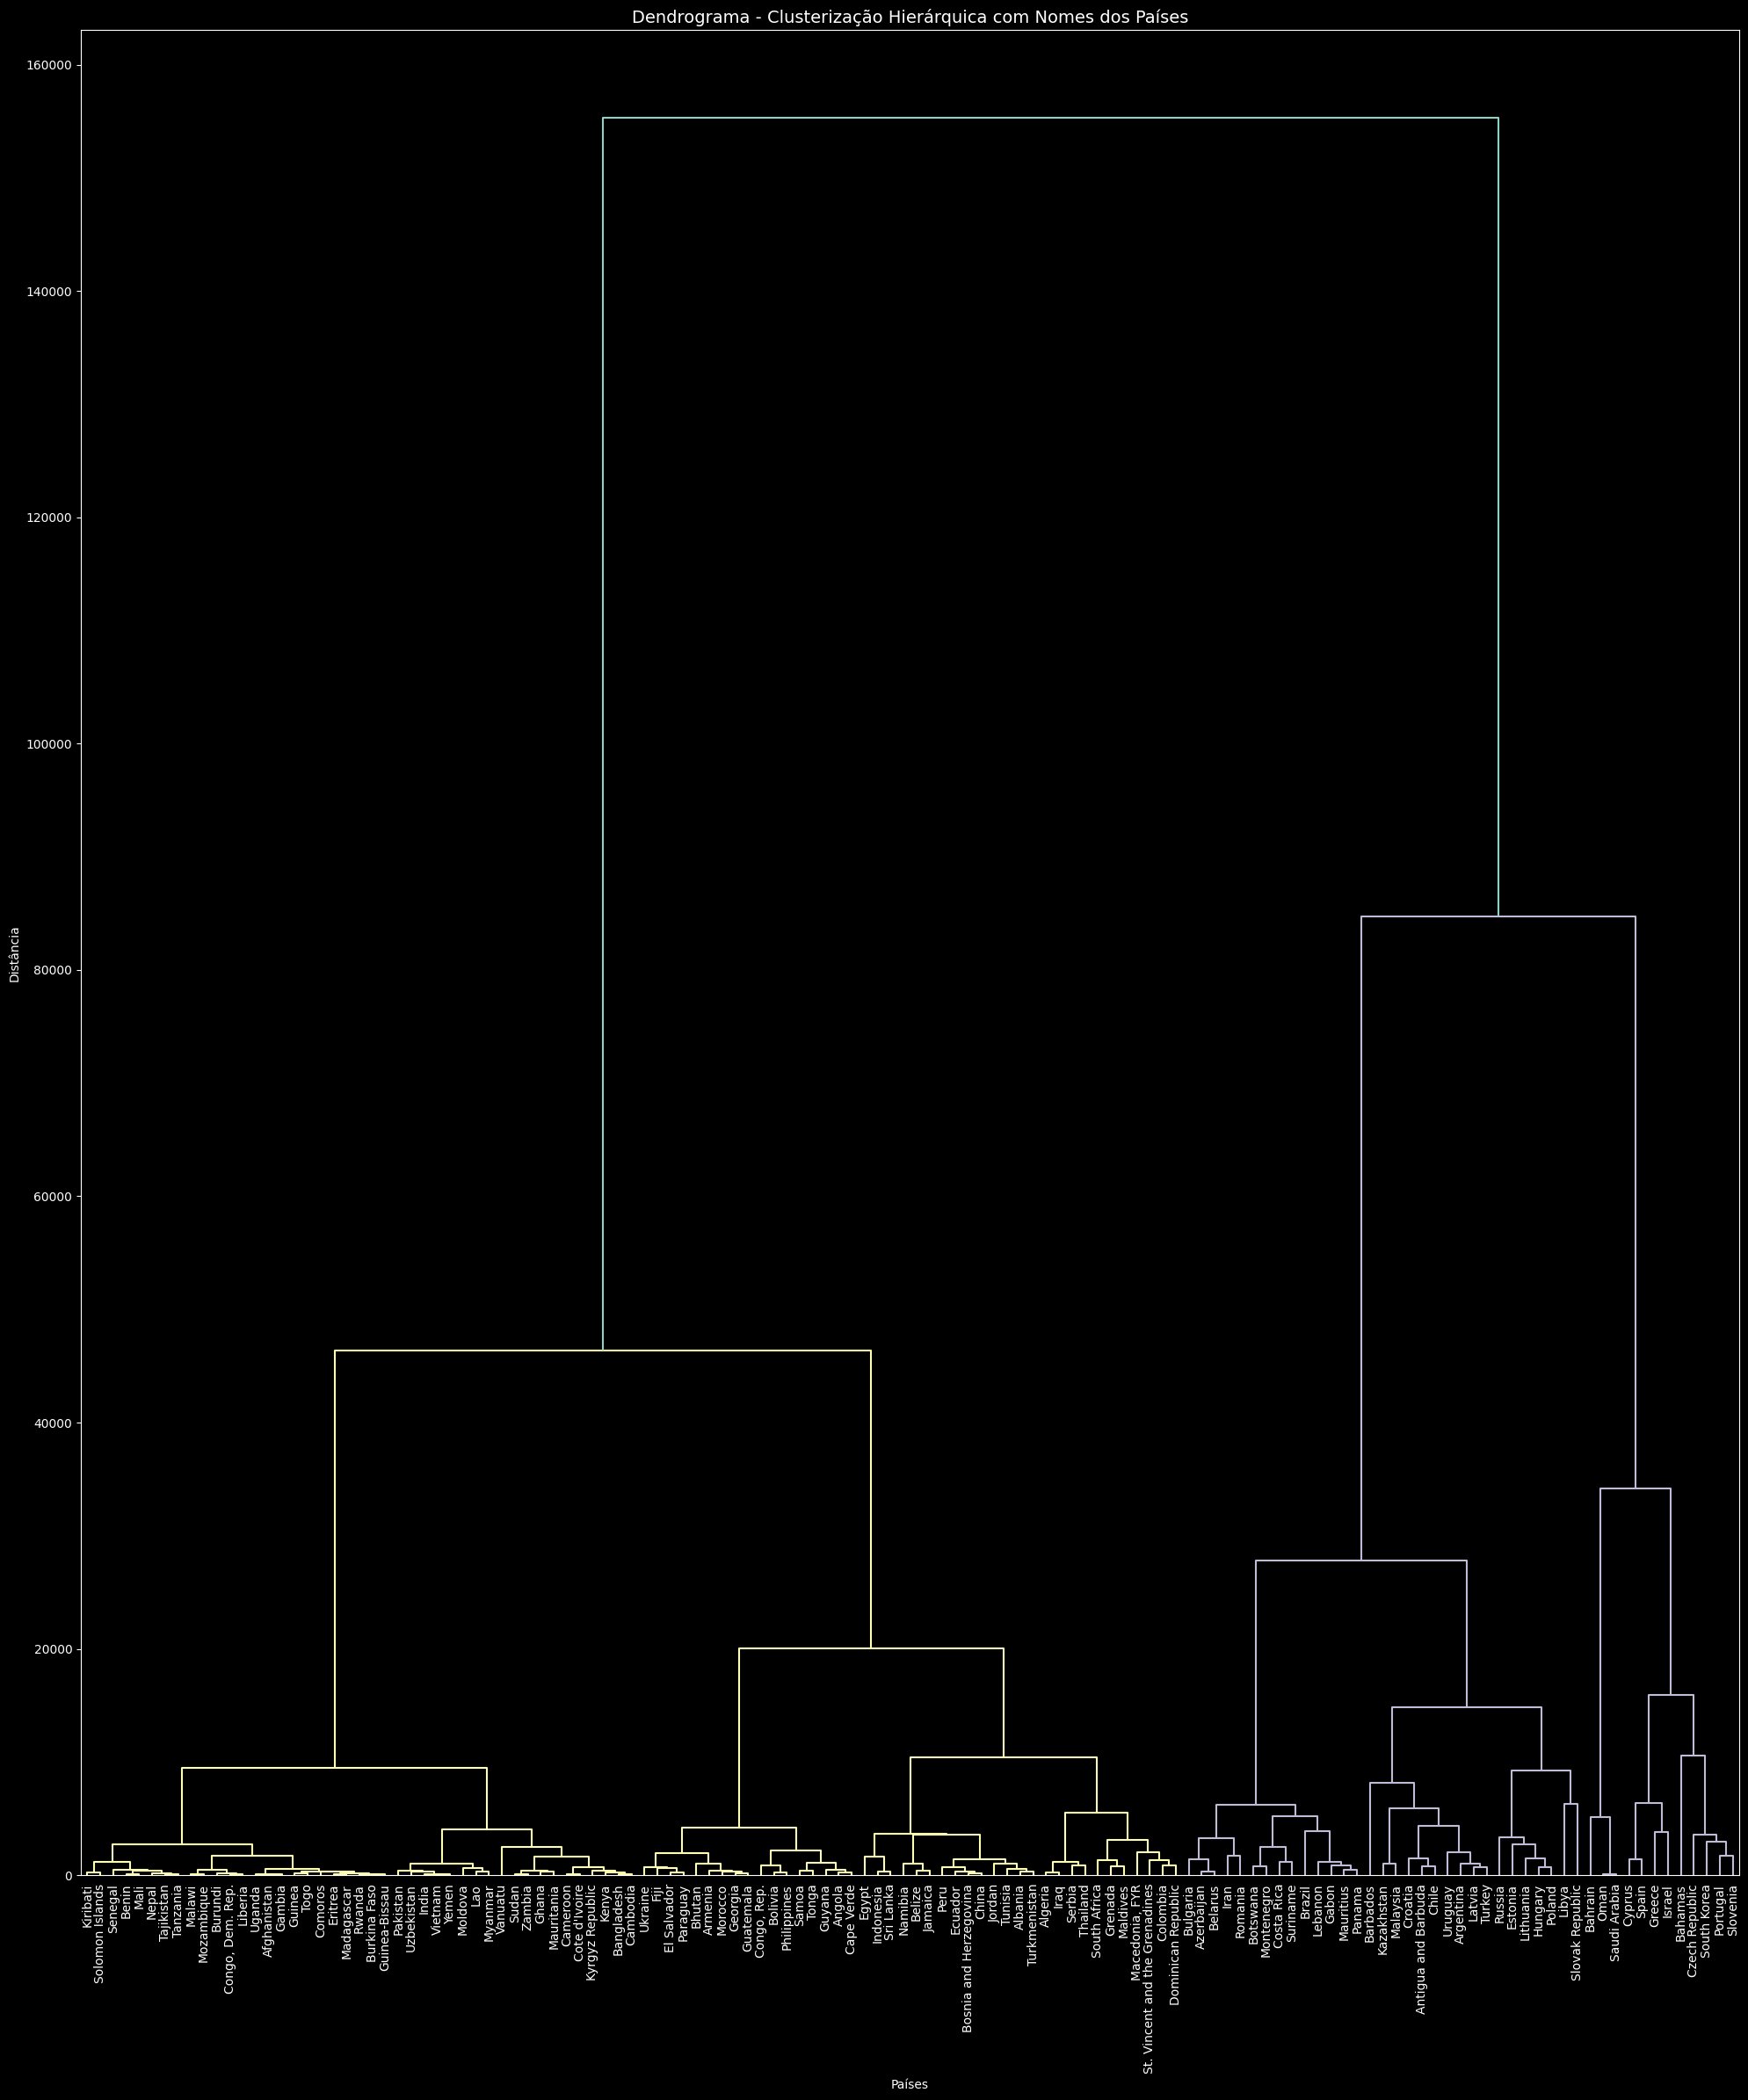

Definindo os clusters usando altura de corte (max_d)
Distribui√ß√£o de pa√≠ses por cluster (Hier√°rquico):
Cluster_Hierarchical
1     24
2     19
3     17
4     14
11     7
6      7
13     5
9      5
7      5
5      4
8      4
20     4
18     2
10     2
16     2
19     2
21     1
12     1
17     1
14     1
15     1
Name: count, dtype: int64

Cluster 1: ['Afghanistan', 'Benin', 'Burkina Faso', 'Burundi', 'Comoros', 'Congo, Dem. Rep.', 'Eritrea', 'Gambia', 'Guinea', 'Guinea-Bissau', 'Kiribati', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mozambique', 'Nepal', 'Rwanda', 'Senegal', 'Solomon Islands', 'Tajikistan', 'Tanzania', 'Togo', 'Uganda']

Cluster 2: ['Bangladesh', 'Cambodia', 'Cameroon', "Cote d'Ivoire", 'Ghana', 'India', 'Kenya', 'Kyrgyz Republic', 'Lao', 'Mauritania', 'Moldova', 'Myanmar', 'Pakistan', 'Sudan', 'Uzbekistan', 'Vanuatu', 'Vietnam', 'Yemen', 'Zambia']

Cluster 3: ['Angola', 'Armenia', 'Bhutan', 'Bolivia', 'Cape Verde', 'Congo, Rep.', 'El Salvador', 'Fiji', 'Georgia', '

In [17]:
# C√©lula 6: Clusteriza√ß√£o Hier√°rquica (com ajuste din√¢mico de n√∫mero de clusters e altura de corte)

# Importa√ß√£o
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Realizando a clusteriza√ß√£o hier√°rquica
Z = linkage(data_cleaned.iloc[:, :-2], method='ward')  # Excluindo clusters para evitar interfer√™ncia

# Recuperando os nomes dos pa√≠ses
country_names = data.loc[data_cleaned.index, 'country']  # Garante alinhamento com data_cleaned

# Ajustes de par√¢metros
max_d = 4500  # Altura de corte ajust√°vel
num_clusters = 4  # N√∫mero desejado de clusters

# Plotando o dendrograma com nomes dos pa√≠ses
plt.figure(figsize=(20, 24))
dendrogram(
    Z,
    labels=country_names.values,
    leaf_rotation=90,
    leaf_font_size=10,
)
plt.title("Dendrograma - Clusteriza√ß√£o Hier√°rquica com Nomes dos Pa√≠ses", fontsize=14)
plt.xlabel("Pa√≠ses")
plt.ylabel("Dist√¢ncia")
plt.tight_layout()
plt.show()

# Determinando os clusters com base no crit√©rio selecionado
print(f"Definindo os clusters usando {'altura de corte (max_d)' if max_d else 'n√∫mero de clusters'}")
if max_d:
    clusters_hierarchical = fcluster(Z, t=max_d, criterion='distance')  # Usando altura de corte
else:
    clusters_hierarchical = fcluster(Z, t=num_clusters, criterion='maxclust')  # Usando n√∫mero de clusters

# Adicionando os clusters ao dataframe
data_cleaned['Cluster_Hierarchical'] = clusters_hierarchical

# Exibindo o n√∫mero de elementos em cada cluster
print("Distribui√ß√£o de pa√≠ses por cluster (Hier√°rquico):")
print(data_cleaned['Cluster_Hierarchical'].value_counts())

# Visualizando os clusters identificados
for cluster_id in range(1, num_clusters + 1):
    cluster_countries = country_names[data_cleaned['Cluster_Hierarchical'] == cluster_id]
    print(f"\nCluster {cluster_id}: {list(cluster_countries)}")


# Result

**Interpreta√ß√£o dos Resultados:**

K-Means:

Os clusters criados indicam agrupamentos coesos baseados na minimiza√ß√£o de dist√¢ncias.
Pa√≠ses pr√≥ximos ao centr√≥ide, como √çndia, L√≠bano e Coreia do Sul, s√£o bons representantes de seus respectivos clusters.
A distribui√ß√£o no scatterplot com jitter refor√ßa que os clusters s√£o distintos, mas ainda apresentam sobreposi√ß√µes em regi√µes de transi√ß√£o.

Hier√°rquico:

O dendrograma oferece uma vis√£o detalhada da hierarquia de agrupamentos, permitindo observar como pa√≠ses se unem progressivamente.
A altura de corte usada para definir os clusters reflete a similaridade/dissimilaridade geral entre os pa√≠ses. 
Alguns pa√≠ses podem ser visualizados como outliers (ex.: pa√≠ses que se unem ao final, como economias muito ricas ou muito pobres).

Conclus√£o

K-Means √© mais pr√°tico e visualmente intuitivo para identificar padr√µes r√°pidos e interpretar centr√≥ides representativos. \
Hier√°rquico √© mais flex√≠vel e oferece insights detalhados sobre a hierarquia de similaridades entre os pa√≠ses. \
Para este projeto, ambos os m√©todos fornecem resultados complementares, com o K-Means permitindo uma interpreta√ß√£o direta e o dendrograma hier√°rquico oferecendo maior profundidade na an√°lise.

**Compare os dois resultados, aponte as semelhan√ßas e diferen√ßas e interprete.**

Os resultados dos modelos de clusteriza√ß√£o revelaram agrupamentos coerentes entre pa√≠ses com caracter√≠sticas socioecon√¥micas e de sa√∫de similares. No modelo de K-Means, os clusters foram definidos pela proximidade dos pa√≠ses aos centr√≥ides. \
Por exemplo, pa√≠ses como √çndia, L√≠bano e Coreia do Sul se destacaram como representativos de seus clusters, refletindo aspectos econ√¥micos, sociais e demogr√°ficos que os diferenciam. Pa√≠ses em desenvolvimento, caracterizados por renda per capita baixa e √≠ndices de sa√∫de em desenvolvimento, foram agrupados em um cluster, enquanto economias avan√ßadas, com alta renda e bons √≠ndices de sa√∫de, formaram outro. O modelo mostrou maior homogeneidade dentro dos clusters, com base na minimiza√ß√£o de dist√¢ncias, e as semelhan√ßas foram refor√ßadas no gr√°fico reduzido por PCA.

Na Clusteriza√ß√£o Hier√°rquica, o dendrograma destacou como os pa√≠ses se unem progressivamente em grupos, refletindo sua similaridade incremental. \
Os pa√≠ses agrupados em est√°gios iniciais compartilham caracter√≠sticas como PIB e expectativa de vida similares, enquanto outliers, como economias extremas, se unem apenas em est√°gios finais. Este modelo destacou nuances adicionais, como subgrupos em economias emergentes e varia√ß√µes dentro de clusters maiores, oferecendo maior profundidade na an√°lise. \
Em ambos os m√©todos, vari√°veis como √≠ndices de sa√∫de, acesso √† educa√ß√£o e estabilidade econ√¥mica foram determinantes para as semelhan√ßas entre pa√≠ses, proporcionando uma vis√£o clara da estrutura global dos dados analisados.

**Escreva em t√≥picos as etapas do algoritmo de K-m√©dias at√© sua converg√™ncia.**

Inicializa√ß√£o: Seleciona 
ùëò
k pontos iniciais como centr√≥ides, podendo ser aleat√≥rios ou otimizados (ex.: K-Means++).

Atribui√ß√£o: Cada ponto dos dados √© atribu√≠do ao cluster cujo centr√≥ide est√° mais pr√≥ximo, com base em uma m√©trica de dist√¢ncia (geralmente, dist√¢ncia euclidiana).

Recalcular Centr√≥ides: Para cada cluster formado, calcula o novo centr√≥ide como a m√©dia dos pontos atribu√≠dos a ele.

Reatribui√ß√£o: Reatribui os pontos aos clusters com base nos novos centr√≥ides.

Converg√™ncia: O processo de recalcular centr√≥ides e reatribuir pontos continua at√© que:

Os centr√≥ides n√£o se movam significativamente entre itera√ß√µes.
Ou um n√∫mero m√°ximo de itera√ß√µes seja atingido.

# Med√≥ide   

Pa√≠ses representando os clusters (Med√≥ides):
Cluster 0: Moldova
Cluster 1: Gabon
Cluster 2: South Korea


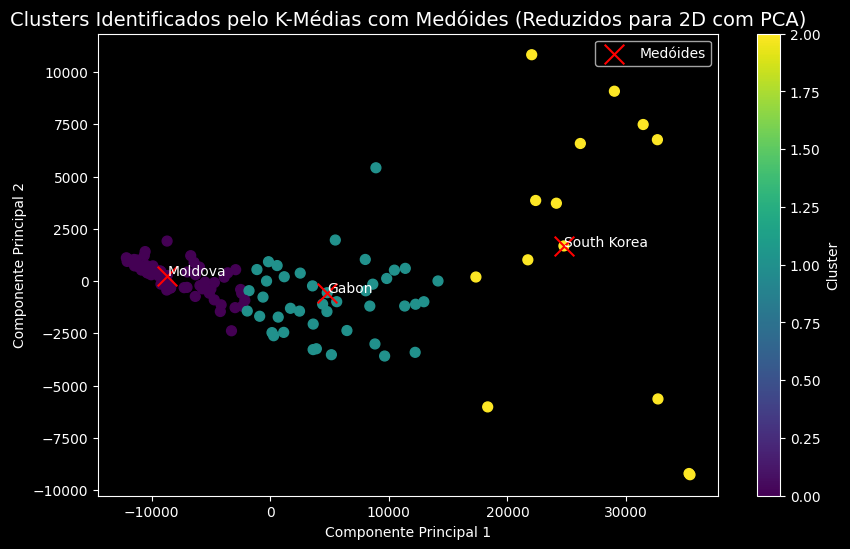

In [21]:
# C√©lula 7: Clusteriza√ß√£o com K-M√©dias usando Med√≥ides

# Importa√ß√µes
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fun√ß√£o para K-M√©dias com med√≥ides
def kmeans_with_medoid(data, n_clusters, max_iter=300, tol=1e-4, random_state=42):
    np.random.seed(random_state)
    
    # Inicializa√ß√£o: Escolha aleat√≥ria dos centr√≥ides
    initial_centroids_idx = np.random.choice(len(data), n_clusters, replace=False)
    centroids = data[initial_centroids_idx]

    for i in range(max_iter):
        # Atribui√ß√£o: Calcula o cluster mais pr√≥ximo para cada ponto
        labels = np.argmin(np.linalg.norm(data[:, np.newaxis] - centroids, axis=2), axis=1)

        # Recalcular centr√≥ides: Encontra o ponto mais pr√≥ximo do baricentro (med√≥ide)
        new_centroids = []
        medoids = []
        for cluster in range(n_clusters):
            cluster_points = data[labels == cluster]
            if len(cluster_points) > 0:  # Certifique-se de que o cluster n√£o est√° vazio
                centroid = cluster_points.mean(axis=0)
                medoid = cluster_points[np.argmin(np.linalg.norm(cluster_points - centroid, axis=1))]
                new_centroids.append(centroid)
                medoids.append(medoid)
            else:
                # Caso o cluster esteja vazio, mantenha o med√≥ide anterior
                new_centroids.append(centroids[cluster])
                medoids.append(centroids[cluster])

        new_centroids = np.array(new_centroids)
        medoids = np.array(medoids)

        # Verificar converg√™ncia (mudan√ßa m√≠nima nos med√≥ides)
        if np.all(np.linalg.norm(medoids - centroids, axis=1) < tol):
            break

        centroids = medoids  # Atualiza os med√≥ides para a pr√≥xima itera√ß√£o

    return labels, medoids

# Aplicando o algoritmo corrigido
data_array = data_cleaned.iloc[:, :-2].values
n_clusters = 3
labels, medoids = kmeans_with_medoid(data_array, n_clusters)

# Adicionando os r√≥tulos ao dataframe
data_cleaned['Cluster_Medoids'] = labels

# Recuperando os nomes dos pa√≠ses
medoid_countries = []
for medoid in medoids:
    distances = np.linalg.norm(data_array - medoid, axis=1)
    closest_country_index = distances.argmin()
    medoid_countries.append(country_names.iloc[closest_country_index])

# Exibindo os nomes dos pa√≠ses representativos (med√≥ides)
print("Pa√≠ses representando os clusters (Med√≥ides):")
for i, country in enumerate(medoid_countries):
    print(f"Cluster {i}: {country}")


# Visualizando os clusters em um gr√°fico 2D (usando PCA para redu√ß√£o de dimensionalidade)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_array)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    data_pca[:, 0], data_pca[:, 1], 
    c=labels, cmap='viridis', s=50
)

# Adicionando os med√≥ides ao gr√°fico
medoids_pca = pca.transform(medoids)
plt.scatter(medoids_pca[:, 0], medoids_pca[:, 1], 
            c='red', marker='x', s=200, label='Med√≥ides')

# Anotando os nomes dos pa√≠ses nos med√≥ides
for i, txt in enumerate(medoid_countries):
    plt.annotate(txt, (medoids_pca[i, 0], medoids_pca[i, 1]), fontsize=10, color='white')

plt.title("Clusters Identificados pelo K-M√©dias com Med√≥ides (Reduzidos para 2D com PCA)", fontsize=14)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.show()


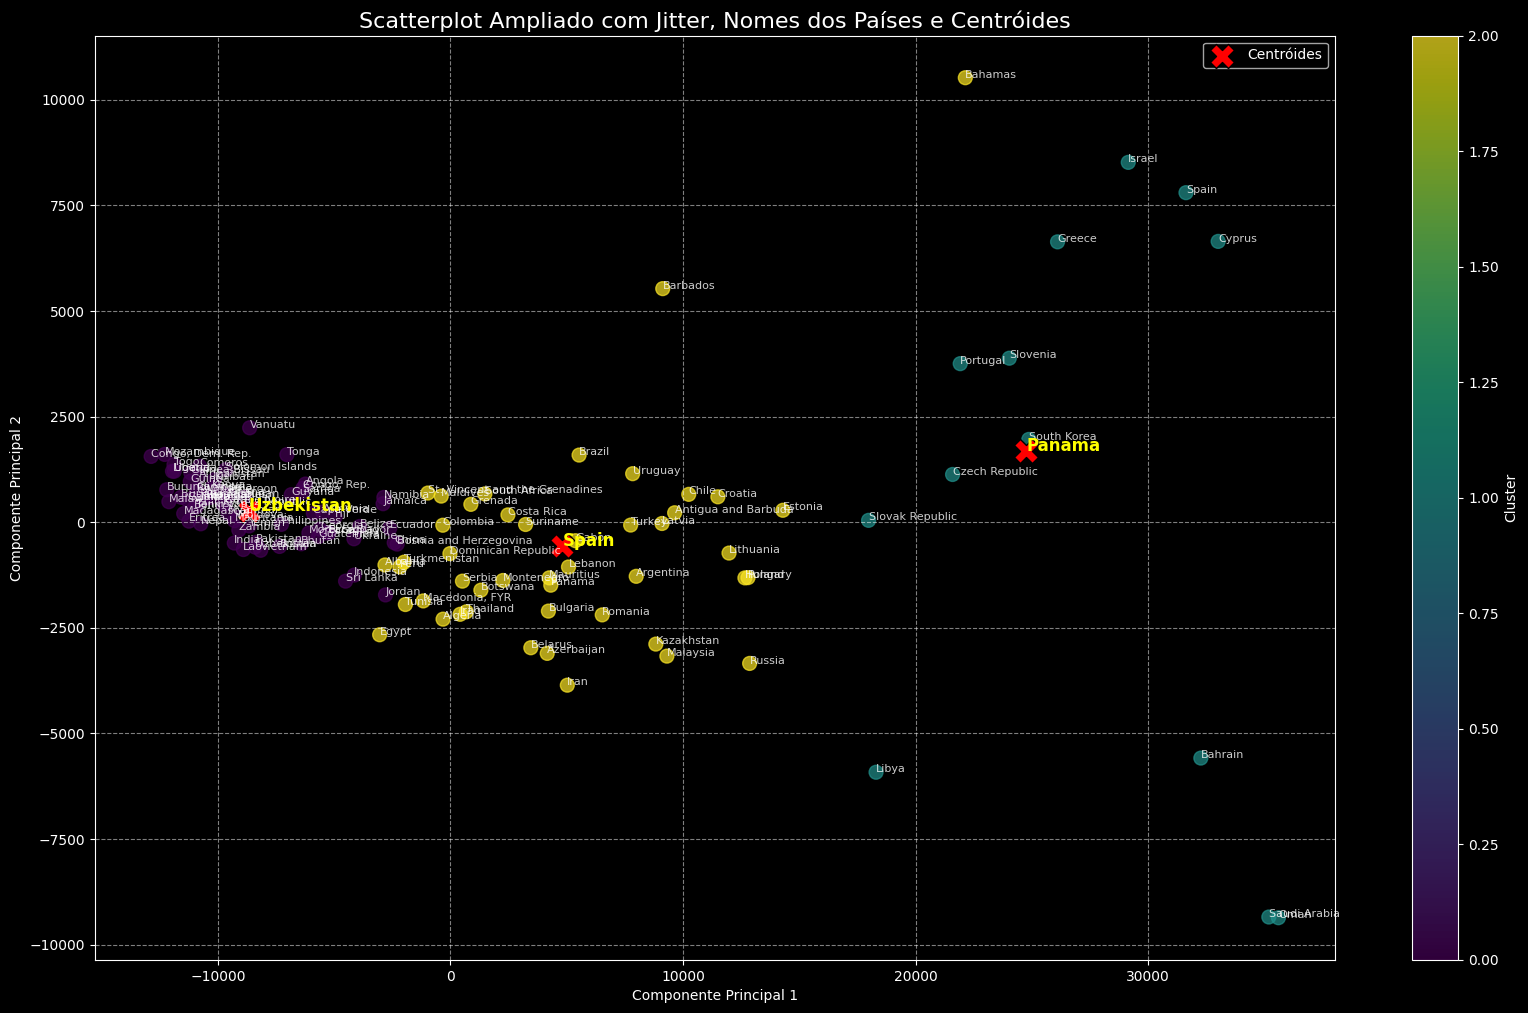

In [22]:
# C√©lula 7.5: Scatterplot Ampliado Centr√≥ides e Med√≥ides

import matplotlib.pyplot as plt
import numpy as np

# Adicionando jitter (ru√≠do aleat√≥rio pequeno) √†s coordenadas
jitter_strength = 300 # Ajuste para controlar a intensidade do espalhamento
data_pca_jittered = data_pca + np.random.normal(0, jitter_strength, data_pca.shape)


# Plotando os clusters em 2D com centr√≥ides destacados
plt.figure(figsize=(20, 12))
scatter = plt.scatter(
    data_pca_jittered[:, 0], data_pca_jittered[:, 1],
    c=data_cleaned['Cluster_KMeans'], cmap='viridis', s=100, alpha=0.7
)

# Adicionando os nomes dos pa√≠ses a cada ponto
for i, txt in enumerate(country_names):
    plt.annotate(txt, (data_pca_jittered[i, 0], data_pca_jittered[i, 1]), fontsize=8, alpha=0.8, color='white')

# Adicionando os centr√≥ides ao gr√°fico (sem jitter nos centr√≥ides)
plt.scatter(medoids_pca[:, 0], medoids_pca[:, 1], 
            c='red', marker='X', s=300, label='Centr√≥ides', edgecolors='black')

# Adicionando os nomes dos pa√≠ses pr√≥ximos aos centr√≥ides
for i, txt in enumerate(centroid_countries):
    plt.annotate(txt, (medoids_pca[i, 0], medoids_pca[i, 1]), fontsize=12, color='yellow', weight='bold')

plt.title("Scatterplot Ampliado com Jitter, Nomes dos Pa√≠ses e Centr√≥ides", fontsize=16)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



**O algoritmo de K-M√©dias √© sens√≠vel a outliers nos dados. Explique.** \
O algoritmo de *K-M√©dia*s minimiza a vari√¢ncia dentro dos clusters utilizando centr√≥ides como o baricentro de cada grupo. Por defini√ß√£o, o centr√≥ide √© calculado como a m√©dia aritm√©tica dos pontos atribu√≠dos ao cluster, o que significa que ele pode ser significativamente deslocado por outliers, pois valores extremos afetam a m√©dia. \ No nosso trabalho, essa sensibilidade seria especialmente problem√°tica para dados como √≠ndices de sa√∫de ou renda per capita, onde pa√≠ses muito ricos ou muito pobres poderiam distorcer os clusters.

No contexto do projeto, identificamos que o K-M√©dias tradicional pode formar clusters onde um √∫nico pa√≠s at√≠pico, como uma grande economia ou um pa√≠s com indicadores extremos, influencia desproporcionalmente o centr√≥ide e, consequentemente, a composi√ß√£o do cluster. Ao adaptar o algoritmo para utilizar med√≥ides, mitigamos esse problema, j√° que os med√≥ides representam pontos reais da base e n√£o s√£o afetados diretamente por outliers. Apesar disso, o K-M√©dias ainda n√£o √© ideal em situa√ß√µes onde h√° muitos dados ruidosos ou fortemente discrepantes.

**Por que o algoritmo de DBScan √© mais robusto √† presen√ßa de outliers?** \
O *DBScan* (Density-Based Spatial Clustering of Applications with Noise) √© mais robusto √† presen√ßa de outliers porque ele identifica grupos com base na densidade dos dados, ao inv√©s de depender de m√©tricas globais como m√©dias ou centr√≥ides. O algoritmo classifica pontos em tr√™s categorias:

**N√∫cleo**: Pontos que t√™m pelo menos um n√∫mero m√≠nimo de vizinhos dentro de uma dist√¢ncia definida. \
**Fronteira**: Pontos que est√£o pr√≥ximos a um n√∫cleo, mas n√£o atendem ao crit√©rio de densidade m√≠nima. \
**Ru√≠do (outliers)**: Pontos que n√£o pertencem a nenhuma das duas categorias anteriores. \

No nosso escopo, o DBScan seria ideal para lidar com dados socioecon√¥micos porque pode separar naturalmente pa√≠ses com caracter√≠sticas extremas (outliers) como dados de ru√≠do, sem for√ß√°-los a pertencer a um cluster. Isso o torna mais adequado para cen√°rios como o nosso, onde as diferen√ßas entre economias e indicadores de sa√∫de s√£o muito amplas. No entanto, a desvantagem do DBScan √© que ele exige uma escolha cuidadosa dos par√¢metros (dist√¢ncia Euclidiana Œµ e densidade m√≠nima), que podem n√£o ser triviais de determinar em bases de dados multidimensionais como a utilizada no projeto.